In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [104]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\MachineLearning\Paper1\Codes\datasets_1111_2005_kidney_disease.csv")

In [105]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [106]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [107]:
#Filling missing data with mean value
df["bgr"]= df["bgr"].fillna(np.mean(df["bgr"]))
df["bu"]= df["bu"].fillna(np.mean(df["bu"]))
df["sc"]= df["sc"].fillna(np.mean(df["sc"]))
df["sod"]= df["sod"].fillna(np.mean(df["sod"]))
df["pot"]= df["pot"].fillna(np.mean(df["pot"]))
df["hemo"]= df["hemo"].fillna(np.mean(df["hemo"]))
df["pcv"]= df["pcv"].fillna(np.mean(df["pcv"]))
df["wc"]= df["wc"].fillna(np.mean(df["wc"]))
df["rc"]= df["rc"].fillna(np.mean(df["rc"]))

In [108]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [109]:
#Assigned the value 0 and 1 to the nominal features
#df['rbc'] = df.rbc.replace(['normal','abnormal'], ['1', '0'])
df["rbc"] = [1 if i == "normal" else 0 for i in df["rbc"]]
#df['pc'] = df.pc.replace(['normal','abnormal'], ['1', '0'])
df["pc"] = [1 if i == "normal" else 0 for i in df["pc"]]
#df['pcc'] = df.pcc.replace(['present','notpresent'], ['1', '0'])
df["pcc"] = [1 if i == "present" else 0 for i in df["pcc"]]
#df['ba'] = df.ba.replace(['present','notpresent'], ['1', '0'])
df["ba"] = [1 if i == "present" else 0 for i in df["ba"]]
#df['htn'] = df.htn.replace(['yes','no'], ['1', '0'])
df["htn"] = [1 if i == "yes" else 0 for i in df["htn"]]
#df['dm'] = df.dm.replace(['yes','no'], ['1', '0'])
df["dm"] = [1 if i == "yes" else 0 for i in df["dm"]]
#df['cad'] = df.cad.replace(['yes','no'], ['1', '0'])
df["cad"] = [1 if i == "yes" else 0 for i in df["cad"]]
#df['appet'] = df.appet.replace(['good','poor'], ['1', '0'])
df["appet"] = [1 if i == "good" else 0 for i in df["appet"]]
#df['pe'] = df.pe.replace(['yes','no'], ['1', '0'])
df["pe"] = [1 if i == "yes" else 0 for i in df["pe"]]
#df['ane'] = df.ane.replace(['yes','no'], ['1', '0'])
df["ane"] = [1 if i == "yes" else 0 for i in df["ane"]]
df["classification"] = [1 if i == "ckd" else 0 for i in df["classification"]]

In [110]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [111]:
total_rows = len (df.axes[0])
print("Rows = " + str(total_rows))

Rows = 400


In [112]:
#Dropping all other rows with NaN values
df = df.dropna(axis=0)

In [113]:
total_rows = len (df.axes[0])
print("Rows = " + str(total_rows))

Rows = 333


In [114]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [115]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [116]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [117]:
df.shape

(333, 26)

In [118]:
X = df.iloc[:, 1:25].values
y = df.iloc[:, 25].values

In [119]:
X

array([[48.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  1.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  1.   ,  0.   ,  0.   ]])

In [120]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [122]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
##### K - NN
# Fitting K-NN to the Training set
import time 
start_time = time.time()

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(X_train, y_train)
y_pred_knn=classifier_knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.02422928810119629 seconds ---


In [124]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_knn = f1_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
print(f1_knn)
print(prec_knn)
print(recall_knn)
#f1_score=0.9565, precision= 0.9705 ,recall=0.9428
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#f1_score=0.9736, precision= 1.0 ,recall=0.9487
#1,1,1


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test, y_pred_knn)
cm_knn

0.9876543209876543
1.0
0.975609756097561


array([[26,  0],
       [ 1, 40]], dtype=int64)

In [125]:
TP_knn = cm_knn[0][0]
FP_knn = cm_knn[0][1]
FN_knn = cm_knn[1][0]
TN_knn = cm_knn[1][1]

# calculate accuracy
knn_accuracy = (float (TP_knn+TN_knn) / float(TP_knn + TN_knn + FP_knn + FN_knn))
    
# calculate mis-classification
knn_misclassification = 1- knn_accuracy
    
# calculate the sensitivity
knn_sensitivity = (TP_knn / float(TP_knn + FN_knn))    # calculate the specificity
knn_specificity = (TN_knn / float(TN_knn + FP_knn))
# calculate precision
knn_precision = (TN_knn / float(TN_knn + FP_knn))    # calculate f_1 score
knn_f1 = 2 * ((knn_precision * knn_sensitivity) / (knn_precision + knn_sensitivity))

# calculate MCC
import math
knn_x= (TP_knn +FP_knn) * (TP_knn + FN_knn) * (TN_knn + FP_knn) * (TN_knn + FN_knn)
knn_mcc = (TP_knn * TN_knn - FP_knn * FN_knn) / float(math.sqrt(knn_x))

print("Accuracy ---> {0}".format(knn_accuracy))
print("Missclassification ---> {0}".format(knn_misclassification))
print("Sensitivity ---> {0}".format(knn_sensitivity))
print("Specificity ---> {0}".format(knn_specificity))
print("Precision ---> {0}".format(knn_precision))
print("F1_Score ---> {0}".format(knn_f1))
print("MCC ---> {0}".format(knn_mcc))

Accuracy ---> 0.9850746268656716
Missclassification ---> 0.014925373134328401
Sensitivity ---> 0.9629629629629629
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 0.9811320754716981
MCC ---> 0.9692657331337372


In [126]:
#Apply PCA to K-NN
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
classifier_knn.fit(X_train_new, y_train)
y_pred_knn_new=classifier_knn.predict(X_test_new)
accuracy_score(y_test, y_pred_knn_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.013047933578491211 seconds ---


In [127]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_knn_new = f1_score(y_test, y_pred_knn_new)
prec_knn_new = precision_score(y_test, y_pred_knn_new)
recall_knn_new = recall_score(y_test, y_pred_knn_new)
print(f1_knn_new)
print(prec_knn_new)
print(recall_knn_new)
#f1_score=0.9714, precision= 0.9714 ,recall=0.9714
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#f1_score=0.9846, precision= 1.0 ,recall=0.9714


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn_new=confusion_matrix(y_test, y_pred_knn_new)
cm_knn_new

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [128]:
TP_knn_new = cm_knn_new[0][0]
FP_knn_new = cm_knn_new[0][1]
FN_knn_new = cm_knn_new[1][0]
TN_knn_new = cm_knn_new[1][1]

# calculate accuracy
knn_accuracy_new = (float (TP_knn_new+TN_knn_new) / float(TP_knn_new + TN_knn_new + FP_knn_new + FN_knn_new))
    
# calculate mis-classification
knn_misclassification_new = 1- knn_accuracy_new
    
# calculate the sensitivity
knn_sensitivity_new = (TP_knn_new / float(TP_knn_new + FN_knn_new))    # calculate the specificity
knn_specificity_new = (TN_knn_new / float(TN_knn_new + FP_knn_new))
# calculate precision
knn_precision_new = (TN_knn_new / float(TN_knn_new + FP_knn_new))    # calculate f_1 score
knn_f1_new = 2 * ((knn_precision_new * knn_sensitivity_new) / (knn_precision_new + knn_sensitivity_new))

# calculate MCC
import math
knn_x_new= (TP_knn_new +FP_knn_new) * (TP_knn_new + FN_knn_new) * (TN_knn_new + FP_knn_new) * (TN_knn_new + FN_knn_new)
knn_mcc_new = (TP_knn_new * TN_knn_new - FP_knn_new * FN_knn_new) / float(math.sqrt(knn_x_new))

print("Accuracy ---> {0}".format(knn_accuracy_new))
print("Missclassification ---> {0}".format(knn_misclassification_new))
print("Sensitivity ---> {0}".format(knn_sensitivity_new))
print("Specificity ---> {0}".format(knn_specificity_new))
print("Precision ---> {0}".format(knn_precision_new))
print("F1_Score ---> {0}".format(knn_f1_new))
print("MCC ---> {0}".format(knn_mcc_new))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


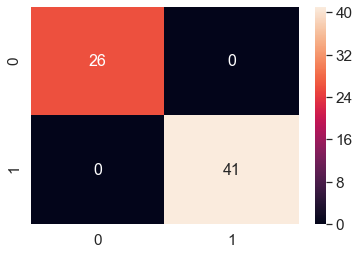

In [131]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_knn=confusion_matrix(y_test, y_pred_knn_new)

df_cm_knn = pd.DataFrame(cm_knn, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_knn, annot=True, annot_kws={"size": 16}) #font size


plt.show()

In [132]:
#print(X_train.shape)
#print(X_train_new.shape)

In [133]:
#pca.explained_variance_ratio_

In [134]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
import time 
start_time = time.time()
classifier_lr=LogisticRegression()
classifier_lr.fit(X_train,y_train)
y_pred_lr=classifier_lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.010089874267578125 seconds ---


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [135]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_lr = f1_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
print(f1_lr)
print(prec_lr)
print(recall_lr)
#f1_score=0.9859, precision=0.9722  ,recall=1.0
#f1_score=1.0, precision=1.0  ,recall= 1.0
#f1_score=0.9870, precision=1.0  ,recall= 0.9743


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test, y_pred_lr)
cm_lr

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [136]:
TP_lr = cm_lr[0][0]
FP_lr = cm_lr[0][1]
FN_lr = cm_lr[1][0]
TN_lr = cm_lr[1][1]

# calculate accuracy
lr_accuracy = (float (TP_lr+TN_lr) / float(TP_lr + TN_lr + FP_lr + FN_lr))
    
# calculate mis-classification
lr_misclassification = 1- lr_accuracy
    
# calculate the sensitivity
lr_sensitivity = (TP_lr / float(TP_lr + FN_lr))    # calculate the specificity
lr_specificity = (TN_lr / float(TN_lr + FP_lr))
# calculate precision
lr_precision = (TN_lr / float(TN_lr + FP_lr))    # calculate f_1 score
lr_f1 = 2 * ((lr_precision * lr_sensitivity) / (lr_precision + lr_sensitivity))

# calculate MCC
import math
lr_x= (TP_lr +FP_lr) * (TP_lr + FN_lr) * (TN_lr + FP_lr) * (TN_lr + FN_lr)
lr_mcc = (TP_lr * TN_lr - FP_lr * FN_lr) / float(math.sqrt(lr_x))

print("Accuracy ---> {0}".format(lr_accuracy))
print("Missclassification ---> {0}".format(lr_misclassification))
print("Sensitivity ---> {0}".format(lr_sensitivity))
print("Specificity ---> {0}".format(lr_specificity))
print("Precision ---> {0}".format(lr_precision))
print("F1_Score ---> {0}".format(lr_f1))
print("MCC ---> {0}".format(lr_mcc))


Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


In [137]:
#Applying PCA to Logistic Regression
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=2)
#X_train_new = pca.fit_transform(X_train)
#X_test_new=pca.transform(X_test)
classifier_lr.fit(X_train_new, y_train)
y_pred_lr_new=classifier_lr.predict(X_test_new)
accuracy_score(y_test, y_pred_lr_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.007578134536743164 seconds ---


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [138]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_lr_new = f1_score(y_test, y_pred_lr_new)
prec_lr_new = precision_score(y_test, y_pred_lr_new)
recall_lr_new = recall_score(y_test, y_pred_lr_new)
print(f1_lr_new)
print(prec_lr_new)
print(recall_lr_new)
#f1_score=0.9714, precision= 0.9714 ,recall=0.9714
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
1,1,1

#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr_new=confusion_matrix(y_test, y_pred_lr_new)
cm_lr_new

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [139]:
TP_lr_new = cm_lr_new[0][0]
FP_lr_new = cm_lr_new[0][1]
FN_lr_new = cm_lr_new[1][0]
TN_lr_new = cm_lr_new[1][1]

# calculate accuracy
lr_accuracy_new = (float (TP_lr_new+TN_lr_new) / float(TP_lr_new + TN_lr_new + FP_lr_new + FN_lr_new))
    
# calculate mis-classification
lr_misclassification_new = 1- lr_accuracy_new
    
# calculate the sensitivity
lr_sensitivity_new = (TP_lr_new / float(TP_lr_new + FN_lr_new))    # calculate the specificity
lr_specificity_new = (TN_lr_new / float(TN_lr_new + FP_lr_new))
# calculate precision
lr_precision_new = (TN_lr_new / float(TN_lr_new + FP_lr_new))    # calculate f_1 score
lr_f1_new = 2 * ((lr_precision_new * lr_sensitivity_new) / (lr_precision_new + lr_sensitivity_new))

# calculate MCC
import math
lr_x_new= (TP_lr_new +FP_lr_new) * (TP_lr_new + FN_lr_new) * (TN_lr_new + FP_lr_new) * (TN_lr_new + FN_lr_new)
lr_mcc_new = (TP_lr_new * TN_lr_new - FP_lr_new * FN_lr_new) / float(math.sqrt(lr_x_new))

print("Accuracy ---> {0}".format(lr_accuracy_new))
print("Missclassification ---> {0}".format(lr_misclassification_new))
print("Sensitivity ---> {0}".format(lr_sensitivity_new))
print("Specificity ---> {0}".format(lr_specificity_new))
print("Precision ---> {0}".format(lr_precision_new))
print("F1_Score ---> {0}".format(lr_f1_new))
print("MCC ---> {0}".format(lr_mcc_new))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


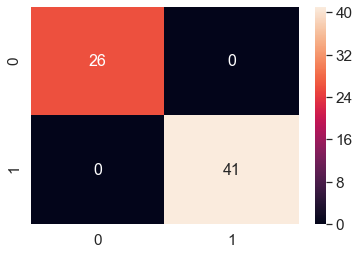

In [140]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_lr=confusion_matrix(y_test, y_pred_lr_new)

df_cm_lr = pd.DataFrame(cm_lr, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_lr, annot=True, annot_kws={"size": 16}) #font size


plt.show()

In [141]:
#SVM
from sklearn.svm import SVC
import time 
start_time = time.time()
classifier_svm=SVC(kernel='linear')
classifier_svm.fit(X_train,y_train)
y_pred_svm=classifier_svm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svm)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.010905027389526367 seconds ---


In [142]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_svm = f1_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
print(f1_svm)
print(prec_svm)
print(recall_svm)
#f1_score=0.9859, precision=0.9722  ,recall=1.0
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#f1_score=0.9870, precision= 1.0 ,recall=0.9743
1,1,1

#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test, y_pred_svm)
cm_svm

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [143]:
TP_svm = cm_svm[0][0]
FP_svm = cm_svm[0][1]
FN_svm = cm_svm[1][0]
TN_svm = cm_svm[1][1]

# calculate accuracy
svm_accuracy = (float (TP_svm+TN_svm) / float(TP_svm + TN_svm + FP_svm + FN_svm))
    
# calculate mis-classification
svm_misclassification = 1- svm_accuracy
    
# calculate the sensitivity
svm_sensitivity = (TP_svm / float(TP_svm + FN_svm))    # calculate the specificity
svm_specificity = (TN_svm / float(TN_svm + FP_svm))
# calculate precision
svm_precision = (TN_svm / float(TN_svm + FP_svm))    # calculate f_1 score
svm_f1 = 2 * ((svm_precision * svm_sensitivity) / (svm_precision + svm_sensitivity))

# calculate MCC
import math
svm_x= (TP_svm +FP_svm) * (TP_svm + FN_svm) * (TN_svm + FP_svm) * (TN_svm + FN_svm)
svm_mcc = (TP_svm * TN_svm - FP_svm * FN_svm) / float(math.sqrt(svm_x))

print("Accuracy ---> {0}".format(svm_accuracy))
print("Missclassification ---> {0}".format(svm_misclassification))
print("Sensitivity ---> {0}".format(svm_sensitivity))
print("Sensitivity ---> {0}".format(svm_specificity))
print("Precision ---> {0}".format(svm_precision))
print("F1_Score ---> {0}".format(svm_f1))
print("MCC ---> {0}".format(svm_mcc))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Sensitivity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


In [144]:
#Applying PCA to SVM
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=3)
#X_train_new = pca.fit_transform(X_train)
#X_test_new=pca.transform(X_test)
classifier_svm.fit(X_train_new, y_train)
y_pred_svm_new=classifier_svm.predict(X_test_new)
accuracy_score(y_test, y_pred_svm_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.008836030960083008 seconds ---


In [145]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_svm_new = f1_score(y_test, y_pred_svm_new)
prec_svm_new = precision_score(y_test, y_pred_svm_new)
recall_svm_new = recall_score(y_test, y_pred_svm_new)
print(f1_svm_new)
print(prec_svm_new)
print(recall_svm_new)
#f1_score=0.9859, precision=0.9722  ,recall=1.0
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
1,1,1


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm_new=confusion_matrix(y_test, y_pred_svm_new)
cm_svm_new

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [146]:
TP_svm_new = cm_svm_new[0][0]
FP_svm_new = cm_svm_new[0][1]
FN_svm_new = cm_svm_new[1][0]
TN_svm_new = cm_svm_new[1][1]

# calculate accuracy
svm_accuracy_new = (float (TP_svm_new+TN_svm_new) / float(TP_svm_new + TN_svm_new + FP_svm_new + FN_svm_new))
    
# calculate mis-classification
svm_misclassification_new = 1- svm_accuracy_new
    
# calculate the sensitivity
svm_sensitivity_new = (TP_svm_new / float(TP_svm_new + FN_svm_new))    # calculate the specificity
svm_specificity_new = (TN_svm_new / float(TN_svm_new + FP_svm_new))
# calculate precision
svm_precision_new = (TN_svm_new / float(TN_svm_new + FP_svm_new))    # calculate f_1 score
svm_f1_new = 2 * ((svm_precision_new * svm_sensitivity_new) / (svm_precision_new + svm_sensitivity_new))

# calculate MCC
import math
svm_x_new= (TP_svm_new +FP_svm_new) * (TP_svm_new + FN_svm_new) * (TN_svm_new + FP_svm_new) * (TN_svm_new + FN_svm_new)
svm_mcc_new = (TP_svm_new * TN_svm_new - FP_svm_new * FN_svm_new) / float(math.sqrt(svm_x_new))

print("Accuracy ---> {0}".format(svm_accuracy_new))
print("Missclassification ---> {0}".format(svm_misclassification_new))
print("Sensitivity ---> {0}".format(svm_sensitivity_new))
print("Specificity ---> {0}".format(svm_specificity_new))
print("Precision ---> {0}".format(svm_precision_new))
print("F1_Score ---> {0}".format(svm_f1_new))
print("MCC ---> {0}".format(svm_mcc_new))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


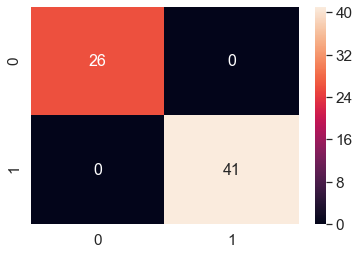

In [147]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_svm=confusion_matrix(y_test, y_pred_svm_new)

df_cm_svm = pd.DataFrame(cm_svm, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_svm, annot=True, annot_kws={"size": 16}) #font size


plt.show()

In [148]:
#KSVM
from sklearn.svm import SVC
import time 
start_time = time.time()
classifier_ksvm=SVC(kernel='rbf')
classifier_ksvm.fit(X_train,y_train)
y_pred_ksvm=classifier_ksvm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_ksvm)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.007141828536987305 seconds ---


In [149]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_ksvm = f1_score(y_test, y_pred_ksvm)
prec_ksvm = precision_score(y_test, y_pred_ksvm)
recall_ksvm = recall_score(y_test, y_pred_ksvm)
print(f1_ksvm)
print(prec_ksvm)
print(recall_ksvm)
#f1_score=0.9859, precision=0.9722  ,recall=1.0
#f1_score=1.0, precision=1.0, recall=1.0


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_ksvm=confusion_matrix(y_test, y_pred_ksvm)
cm_svm

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [150]:
TP_ksvm = cm_ksvm[0][0]
FP_ksvm = cm_ksvm[0][1]
FN_ksvm = cm_ksvm[1][0]
TN_ksvm = cm_ksvm[1][1]

# calculate accuracy
ksvm_accuracy = (float (TP_ksvm+TN_ksvm) / float(TP_ksvm + TN_ksvm + FP_ksvm + FN_ksvm))
    
# calculate mis-classification
ksvm_misclassification = 1- ksvm_accuracy
    
# calculate the sensitivity
ksvm_sensitivity = (TP_ksvm / float(TP_ksvm + FN_ksvm))    # calculate the specificity
ksvm_specificity = (TN_ksvm / float(TN_ksvm + FP_ksvm))
# calculate precision
ksvm_precision = (TN_ksvm / float(TN_ksvm + FP_ksvm))    # calculate f_1 score
ksvm_f1 = 2 * ((ksvm_precision * ksvm_sensitivity) / (ksvm_precision + ksvm_sensitivity))

# calculate MCC
import math
ksvm_x= (TP_ksvm +FP_ksvm) * (TP_ksvm + FN_ksvm) * (TN_ksvm + FP_ksvm) * (TN_ksvm + FN_ksvm)
ksvm_mcc = (TP_ksvm * TN_ksvm - FP_ksvm * FN_ksvm) / float(math.sqrt(ksvm_x))

print("Accuracy ---> {0}".format(ksvm_accuracy))
print("Missclassification ---> {0}".format(ksvm_misclassification))
print("Sensitivity ---> {0}".format(ksvm_sensitivity))
print("Specificity ---> {0}".format(ksvm_specificity))
print("Precision ---> {0}".format(ksvm_precision))
print("F1_Score ---> {0}".format(ksvm_f1))
print("MCC ---> {0}".format(ksvm_mcc))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


In [151]:
#Applying PCA to KSVM
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
classifier_ksvm.fit(X_train_new, y_train)
y_pred_ksvm_new=classifier_ksvm.predict(X_test_new)
accuracy_score(y_test, y_pred_ksvm_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.016736268997192383 seconds ---


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [152]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_ksvm_new = f1_score(y_test, y_pred_ksvm_new)
prec_ksvm_new = precision_score(y_test, y_pred_ksvm_new)
recall_ksvm_new = recall_score(y_test, y_pred_ksvm_new)
print(f1_ksvm_new)
print(prec_ksvm_new)
print(recall_ksvm_new)
#f1_score=0.9859, precision=0.9722  ,recall=1.0
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#1,1,1


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_ksvm_new=confusion_matrix(y_test, y_pred_ksvm_new)
cm_ksvm_new

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [153]:
TP_ksvm_new = cm_ksvm_new[0][0]
FP_ksvm_new = cm_ksvm_new[0][1]
FN_ksvm_new = cm_ksvm_new[1][0]
TN_ksvm_new = cm_ksvm_new[1][1]

# calculate accuracy
ksvm_accuracy_new = (float (TP_ksvm_new+TN_ksvm_new) / float(TP_ksvm_new + TN_ksvm_new + FP_ksvm_new + FN_ksvm_new))
    
# calculate mis-classification
ksvm_misclassification_new = 1- ksvm_accuracy_new
    
# calculate the sensitivity
ksvm_sensitivity_new = (TP_ksvm_new / float(TP_ksvm_new + FN_ksvm_new))    # calculate the specificity
ksvm_specificity_new = (TN_ksvm_new / float(TN_ksvm_new + FP_ksvm_new))
# calculate precision
ksvm_precision_new = (TN_ksvm_new / float(TN_ksvm_new + FP_ksvm_new))    # calculate f_1 score
ksvm_f1_new = 2 * ((ksvm_precision_new * ksvm_sensitivity_new) / (ksvm_precision_new + ksvm_sensitivity_new))

# calculate MCC
import math
ksvm_x_new= (TP_ksvm_new +FP_ksvm_new) * (TP_ksvm_new + FN_ksvm_new) * (TN_ksvm_new + FP_ksvm_new) * (TN_ksvm_new + FN_ksvm_new)
ksvm_mcc_new = (TP_ksvm_new * TN_ksvm_new - FP_ksvm_new * FN_ksvm_new) / float(math.sqrt(ksvm_x_new))

print("Accuracy ---> {0}".format(ksvm_accuracy_new))
print("Missclassification ---> {0}".format(ksvm_misclassification_new))
print("Sensitivity ---> {0}".format(ksvm_sensitivity_new))
print("Specificity ---> {0}".format(ksvm_specificity_new))
print("Precision ---> {0}".format(ksvm_precision_new))
print("F1_Score ---> {0}".format(ksvm_f1_new))
print("MCC ---> {0}".format(ksvm_mcc_new))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


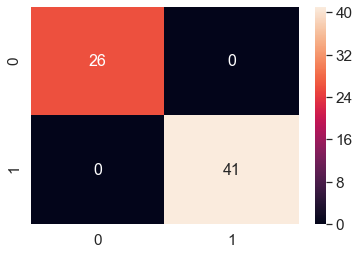

In [154]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_ksvm=confusion_matrix(y_test, y_pred_ksvm_new)

df_cm_ksvm = pd.DataFrame(cm_ksvm, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_ksvm, annot=True, annot_kws={"size": 16}) #font size


plt.show()

In [155]:
#NB
from sklearn.naive_bayes import GaussianNB
import time 
start_time = time.time()
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB=classifier_NB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_NB)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.011851787567138672 seconds ---


In [156]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_NB = f1_score(y_test, y_pred_NB)
prec_NB = precision_score(y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)
print(f1_NB)
print(prec_NB)
print(recall_NB)
#f1_score=0.9565, precision=0.9705, recall=0.9428
#f1_score=0.9180, precision=1.0, recall=0.8484
#f1_score=0.9375, precision=1.0, recall=0.8823
#f1_score=0.9677, precision=1.0, recall=0.9375

#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_NB=confusion_matrix(y_test, y_pred_NB)
cm_NB

0.9487179487179488
1.0
0.9024390243902439


array([[26,  0],
       [ 4, 37]], dtype=int64)

In [157]:
TP_NB = cm_NB[0][0]
FP_NB = cm_NB[0][1]
FN_NB = cm_NB[1][0]
TN_NB = cm_NB[1][1]

# calculate accuracy
NB_accuracy = (float (TP_NB+TN_NB) / float(TP_NB + TN_NB + FP_NB + FN_NB))
    
# calculate mis-classification
NB_misclassification = 1- NB_accuracy
    
# calculate the sensitivity
NB_sensitivity = (TP_NB / float(TP_NB + FN_NB))    # calculate the specificity
NB_specificity = (TN_NB / float(TN_NB + FP_NB))
# calculate precision
NB_precision = (TN_NB / float(TN_NB + FP_NB))    # calculate f_1 score
NB_f1 = 2 * ((NB_precision * NB_sensitivity) / (NB_precision + NB_sensitivity))

# calculate MCC
import math
NB_x= (TP_NB +FP_NB) * (TP_NB + FN_NB) * (TN_NB + FP_NB) * (TN_NB + FN_NB)
NB_mcc = (TP_NB * TN_NB - FP_NB * FN_NB) / float(math.sqrt(NB_x))

print("Accuracy ---> {0}".format(NB_accuracy))
print("Missclassification ---> {0}".format(NB_misclassification))
print("Sensitivity ---> {0}".format(NB_sensitivity))
print("Specificity ---> {0}".format(NB_specificity))
print("Precision ---> {0}".format(NB_precision))
print("F1_Score ---> {0}".format(NB_f1))
print("MCC ---> {0}".format(NB_mcc))

Accuracy ---> 0.9402985074626866
Missclassification ---> 0.05970149253731338
Sensitivity ---> 0.8666666666666667
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 0.9285714285714286
MCC ---> 0.8843719925111894


In [158]:
#Applying PCA to NB
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
classifier_NB.fit(X_train_new, y_train)
y_pred_NB_new=classifier_NB.predict(X_test_new)
accuracy_score(y_test, y_pred_NB_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.01199197769165039 seconds ---


In [159]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_NB_new = f1_score(y_test, y_pred_NB_new)
prec_NB_new = precision_score(y_test, y_pred_NB_new)
recall_NB_new = recall_score(y_test, y_pred_NB_new)
print(f1_NB_new)
print(prec_NB_new)
print(recall_NB_new)
#f1_score=0.9859, precision=0.9722, recall=1.0
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#1,1,1


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_NB_new=confusion_matrix(y_test, y_pred_NB_new)
cm_NB_new

0.9876543209876543
1.0
0.975609756097561


array([[26,  0],
       [ 1, 40]], dtype=int64)

In [160]:
TP_NB_new = cm_NB_new[0][0]
FP_NB_new = cm_NB_new[0][1]
FN_NB_new = cm_NB_new[1][0]
TN_NB_new = cm_NB_new[1][1]

# calculate accuracy
NB_accuracy_new = (float (TP_NB_new+TN_NB_new) / float(TP_NB_new + TN_NB_new + FP_NB_new + FN_NB_new))
    
# calculate mis-classification
NB_misclassification_new = 1- NB_accuracy_new
    
# calculate the sensitivity
NB_sensitivity_new = (TP_NB_new / float(TP_NB_new + FN_NB_new))    # calculate the specificity
NB_specificity_new = (TN_NB_new / float(TN_NB_new + FP_NB_new))
# calculate precision
NB_precision_new = (TN_NB_new / float(TN_NB_new + FP_NB_new))    # calculate f_1 score
NB_f1_new = 2 * ((NB_precision_new * NB_sensitivity_new) / (NB_precision_new + NB_sensitivity_new))

# calculate MCC
import math
NB_x_new= (TP_NB_new +FP_NB_new) * (TP_NB_new + FN_NB_new) * (TN_NB_new + FP_NB_new) * (TN_NB_new + FN_NB_new)
NB_mcc_new = (TP_NB_new * TN_NB_new - FP_NB_new * FN_NB_new) / float(math.sqrt(NB_x_new))

print("Accuracy ---> {0}".format(NB_accuracy_new))
print("Missclassification ---> {0}".format(NB_misclassification_new))
print("Sensitivity ---> {0}".format(NB_sensitivity_new))
print("Specificity ---> {0}".format(NB_specificity_new))
print("Precision ---> {0}".format(NB_precision_new))
print("F1_Score ---> {0}".format(NB_f1_new))
print("MCC ---> {0}".format(NB_mcc_new))

Accuracy ---> 0.9850746268656716
Missclassification ---> 0.014925373134328401
Sensitivity ---> 0.9629629629629629
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 0.9811320754716981
MCC ---> 0.9692657331337372


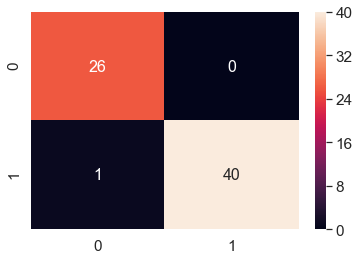

In [161]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_NB=confusion_matrix(y_test, y_pred_NB_new)

df_cm_NB = pd.DataFrame(cm_NB, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 16}) #font size


plt.show()

In [162]:
#DT
from sklearn.tree import DecisionTreeClassifier
import time 
start_time = time.time()
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)
y_pred_dt=classifier_dt.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_dt)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.009972333908081055 seconds ---


In [163]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_dt = f1_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
print(f1_dt)
print(prec_dt)
print(recall_dt)
#f1_score=0.9565, precision= 0.9705 ,recall=0.9428
#f1_score=0.9552, precision= 0.9411 ,recall=0.9696
#f1_score=0.9836, precision= 1.0 ,recall=0.9677
#f1_score=0.9841, precision= 1.0 ,recall=0.9687


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test, y_pred_dt)
cm_dt

0.9512195121951219
0.9512195121951219
0.9512195121951219


array([[24,  2],
       [ 2, 39]], dtype=int64)

In [164]:
TP_dt = cm_dt[0][0]
FP_dt = cm_dt[0][1]
FN_dt = cm_dt[1][0]
TN_dt = cm_dt[1][1]

# calculate accuracy
dt_accuracy = (float (TP_dt+TN_dt) / float(TP_dt + TN_dt + FP_dt + FN_dt))
    
# calculate mis-classification
dt_misclassification = 1- dt_accuracy
    
# calculate the sensitivity
dt_sensitivity = (TP_dt / float(TP_dt + FN_dt))    # calculate the specificity
dt_specificity = (TN_dt / float(TN_dt + FP_dt))
# calculate precision
dt_precision = (TN_dt / float(TN_dt + FP_dt))    # calculate f_1 score
dt_f1 = 2 * ((dt_precision * dt_sensitivity) / (dt_precision + dt_sensitivity))

# calculate MCC
import math
dt_x= (TP_dt +FP_dt) * (TP_dt + FN_dt) * (TN_dt + FP_dt) * (TN_dt + FN_dt)
dt_mcc = (TP_dt * TN_dt - FP_dt * FN_dt) / float(math.sqrt(dt_x))

print("Accuracy ---> {0}".format(dt_accuracy))
print("Missclassification ---> {0}".format(dt_misclassification))
print("Sensitivity ---> {0}".format(dt_sensitivity))
print("Specificity ---> {0}".format(dt_specificity))
print("Precision ---> {0}".format(dt_precision))
print("F1_Score ---> {0}".format(dt_f1))
print("MCC ---> {0}".format(dt_mcc))

Accuracy ---> 0.9402985074626866
Missclassification ---> 0.05970149253731338
Sensitivity ---> 0.9230769230769231
Specificity ---> 0.9512195121951219
Precision ---> 0.9512195121951219
F1_Score ---> 0.9369369369369369
MCC ---> 0.874296435272045


In [165]:
#Applying PCA to DT
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
classifier_dt.fit(X_train_new, y_train)
y_pred_dt_new=classifier_dt.predict(X_test_new)
accuracy_score(y_test, y_pred_dt_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.012443780899047852 seconds ---


In [166]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_dt_new = f1_score(y_test, y_pred_dt_new)
prec_dt_new = precision_score(y_test, y_pred_dt_new)
recall_dt_new = recall_score(y_test, y_pred_dt_new)
print(f1_dt_new)
print(prec_dt_new)
print(recall_dt_new)
#f1_score=0.9859, precision= 0.9722 ,recall=1.0
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#1,1,1



#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_dt_new=confusion_matrix(y_test, y_pred_dt_new)
cm_dt_new

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [167]:
TP_dt_new = cm_dt_new[0][0]
FP_dt_new = cm_dt_new[0][1]
FN_dt_new = cm_dt_new[1][0]
TN_dt_new = cm_dt_new[1][1]

# calculate accuracy
dt_accuracy_new = (float (TP_dt_new+TN_dt_new) / float(TP_dt_new + TN_dt_new + FP_dt_new + FN_dt_new))
    
# calculate mis-classification
dt_misclassification_new = 1- dt_accuracy_new
    
# calculate the sensitivity
dt_sensitivity_new = (TP_dt_new / float(TP_dt_new + FN_dt_new))    # calculate the specificity
dt_specificity_new = (TN_dt_new / float(TN_dt_new + FP_dt_new))
# calculate precision
dt_precision_new = (TN_dt_new / float(TN_dt_new + FP_dt_new))    # calculate f_1 score
dt_f1_new = 2 * ((dt_precision_new * dt_sensitivity_new) / (dt_precision_new + dt_sensitivity_new))

# calculate MCC
import math
dt_x_new= (TP_dt_new +FP_dt_new) * (TP_dt_new + FN_dt_new) * (TN_dt_new + FP_dt_new) * (TN_dt_new + FN_dt_new)
dt_mcc_new = (TP_dt_new * TN_dt_new - FP_dt_new * FN_dt_new) / float(math.sqrt(dt_x_new))

print("Accuracy ---> {0}".format(dt_accuracy_new))
print("Missclassification ---> {0}".format(dt_misclassification_new))
print("Sensitivity ---> {0}".format(dt_sensitivity_new))
print("Specificity ---> {0}".format(dt_specificity_new))
print("Precision ---> {0}".format(dt_precision_new))
print("F1_Score ---> {0}".format(dt_f1_new))
print("MCC ---> {0}".format(dt_mcc_new))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


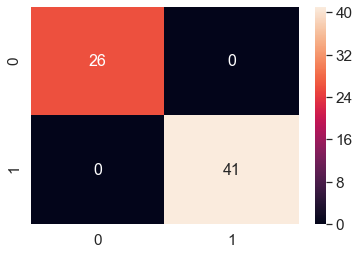

In [168]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_dt=confusion_matrix(y_test, y_pred_dt_new)

df_cm_dt = pd.DataFrame(cm_dt, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_dt, annot=True, annot_kws={"size": 16}) #font size


plt.show()

# Random Forest

In [169]:
#RF
from sklearn.ensemble import RandomForestClassifier
import time 
start_time = time.time()
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)
y_pred_rf=classifier_rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rf)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.057427167892456055 seconds ---


In [170]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_rf = f1_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print(f1_rf)
print(prec_rf)
print(recall_rf)
#f1_score=0.9859, precision= 0.9722 ,recall=1.0
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#f1_score=0.9841, precision= 0.9687 ,recall=1.0
#f1_score=0.9841, precision= 1.0 ,recall=0.96875



#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test, y_pred_rf)
cm_rf

0.975609756097561
0.975609756097561
0.975609756097561


array([[25,  1],
       [ 1, 40]], dtype=int64)

In [171]:
TP_rf = cm_rf[0][0]
FP_rf = cm_rf[0][1]
FN_rf = cm_rf[1][0]
TN_rf = cm_rf[1][1]

# calculate accuracy
rf_accuracy = (float (TP_rf+TN_rf) / float(TP_rf + TN_rf + FP_rf + FN_rf))
    
# calculate mis-classification
rf_misclassification = 1- rf_accuracy
    
# calculate the sensitivity
rf_sensitivity = (TP_rf / float(TP_rf + FN_rf))    # calculate the specificity
rf_specificity = (TN_rf / float(TN_rf + FP_rf))
# calculate precision
rf_precision = (TN_rf / float(TN_rf + FP_rf))    # calculate f_1 score
rf_f1 = 2 * ((rf_precision * rf_sensitivity) / (rf_precision + rf_sensitivity))

# calculate MCC
import math
rf_x= (TP_rf +FP_rf) * (TP_rf + FN_rf) * (TN_rf + FP_rf) * (TN_rf + FN_rf)
rf_mcc = (TP_rf * TN_rf - FP_rf * FN_rf) / float(math.sqrt(rf_x))

print("Accuracy ---> {0}".format(rf_accuracy))
print("Missclassification ---> {0}".format(rf_misclassification))
print("Sensitivity ---> {0}".format(rf_sensitivity))
print("Sensitivity ---> {0}".format(rf_specificity))
print("Precision ---> {0}".format(rf_precision))
print("F1_Score ---> {0}".format(rf_f1))
print("MCC ---> {0}".format(rf_mcc))

Accuracy ---> 0.9701492537313433
Missclassification ---> 0.02985074626865669
Sensitivity ---> 0.9615384615384616
Sensitivity ---> 0.975609756097561
Precision ---> 0.975609756097561
F1_Score ---> 0.9685230024213075
MCC ---> 0.9371482176360225


In [172]:
#Applying PCA to RF
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
classifier_rf.fit(X_train_new, y_train)
y_pred_rf_new=classifier_rf.predict(X_test_new)
accuracy_score(y_test, y_pred_rf_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.05435037612915039 seconds ---


In [173]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_rf_new = f1_score(y_test, y_pred_rf_new)
prec_rf_new = precision_score(y_test, y_pred_rf_new)
recall_rf_new = recall_score(y_test, y_pred_rf_new)
print(f1_rf_new)
print(prec_rf_new)
print(recall_rf_new)
#f1_score=0.9859, precision= 0.9722 ,recall=1.0
#f1_score=0.9850, precision= 1.0 ,recall=0.9705
#1,1,1



#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_rf_new=confusion_matrix(y_test, y_pred_rf_new)
cm_rf_new

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [174]:
TP_rf_new = cm_rf_new[0][0]
FP_rf_new = cm_rf_new[0][1]
FN_rf_new = cm_rf_new[1][0]
TN_rf_new = cm_rf_new[1][1]

# calculate accuracy
rf_accuracy_new = (float (TP_rf_new+TN_rf_new) / float(TP_rf_new + TN_rf_new + FP_rf_new + FN_rf_new))
    
# calculate mis-classification
rf_misclassification_new = 1- rf_accuracy_new
    
# calculate the sensitivity
rf_sensitivity_new = (TP_rf_new / float(TP_rf_new + FN_rf_new))    # calculate the specificity
rf_specificity_new = (TN_rf_new / float(TN_rf_new + FP_rf_new))
# calculate precision
rf_precision_new = (TN_rf_new / float(TN_rf_new + FP_rf_new))    # calculate f_1 score
rf_f1_new = 2 * ((rf_precision_new * rf_sensitivity_new) / (rf_precision_new + rf_sensitivity_new))

# calculate MCC
import math
rf_x_new= (TP_rf_new +FP_rf_new) * (TP_rf_new + FN_rf_new) * (TN_rf_new + FP_rf_new) * (TN_rf_new + FN_rf_new)
rf_mcc_new = (TP_rf_new * TN_rf_new - FP_rf_new * FN_rf_new) / float(math.sqrt(rf_x_new))

print("Accuracy ---> {0}".format(rf_accuracy_new))
print("Missclassification ---> {0}".format(rf_misclassification_new))
print("Sensitivity ---> {0}".format(rf_sensitivity_new))
print("Specificity ---> {0}".format(rf_specificity_new))
print("Precision ---> {0}".format(rf_precision_new))
print("F1_Score ---> {0}".format(rf_f1_new))
print("MCC ---> {0}".format(rf_mcc_new))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


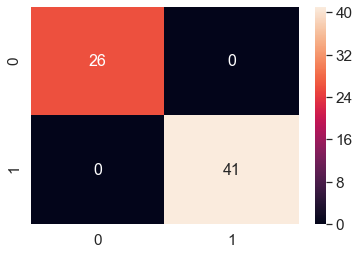

In [175]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_rf=confusion_matrix(y_test, y_pred_rf_new)

df_cm_rf = pd.DataFrame(cm_rf, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_rf, annot=True, annot_kws={"size": 16}) #font size


plt.show()

# XG Boost

In [176]:
#xgb
from xgboost import XGBClassifier
import time 
start_time = time.time()
classifier_xgb =XGBClassifier()
classifier_xgb.fit(X_train, y_train)
y_pred_xgb=classifier_xgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_xgb)
print("--- %s seconds ---" % (time.time() - start_time))


[02:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--- 0.14440536499023438 seconds ---


C:\Users\KIIT\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [177]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_xgb = f1_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f1_xgb)
print(prec_xgb)
print(recall_xgb)
#f1_score=0.9859, precision= 0.9722 ,recall=1.0
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#f1_score=0.9841, precision= 0.9687 ,recall=1.0
#f1_score=0.9841, precision= 1.0 ,recall=0.96875



#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_xgb=confusion_matrix(y_test, y_pred_xgb)
cm_xgb


0.963855421686747
0.9523809523809523
0.975609756097561


array([[24,  2],
       [ 1, 40]], dtype=int64)

In [178]:

TP_xgb = cm_xgb[0][0]
FP_xgb = cm_xgb[0][1]
FN_xgb = cm_xgb[1][0]
TN_xgb = cm_xgb[1][1]

# calculate accuracy
xgb_accuracy = (float (TP_xgb+TN_xgb) / float(TP_xgb + TN_xgb + FP_xgb + FN_xgb))
    
# calculate mis-classification
xgb_misclassification = 1- xgb_accuracy
    
# calculate the sensitivity
xgb_sensitivity = (TP_xgb / float(TP_xgb + FN_xgb))    # calculate the specificity
xgb_specificity = (TN_xgb / float(TN_xgb + FP_xgb))
# calculate precision
xgb_precision = (TN_xgb / float(TN_xgb + FP_xgb))    # calculate f_1 score
xgb_f1 = 2 * ((xgb_precision * xgb_sensitivity) / (xgb_precision + xgb_sensitivity))

# calculate MCC
import math
xgb_x= (TP_xgb +FP_xgb) * (TP_xgb + FN_xgb) * (TN_xgb + FP_xgb) * (TN_xgb + FN_xgb)
xgb_mcc = (TP_xgb * TN_xgb - FP_xgb * FN_xgb) / float(math.sqrt(xgb_x))

print("Accuracy ---> {0}".format(xgb_accuracy))
print("Missclassification ---> {0}".format(xgb_misclassification))
print("Sensitivity ---> {0}".format(xgb_sensitivity))
print("Sensitivity ---> {0}".format(xgb_specificity))
print("Precision ---> {0}".format(xgb_precision))
print("F1_Score ---> {0}".format(xgb_f1))
print("MCC ---> {0}".format(xgb_mcc))

Accuracy ---> 0.9552238805970149
Missclassification ---> 0.04477611940298509
Sensitivity ---> 0.96
Sensitivity ---> 0.9523809523809523
Precision ---> 0.9523809523809523
F1_Score ---> 0.9561752988047808
MCC ---> 0.9055079283127736


In [179]:

#Applying PCA to xgb
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
classifier_xgb.fit(X_train_new, y_train)
y_pred_xgb_new=classifier_xgb.predict(X_test_new)
accuracy_score(y_test, y_pred_xgb_new)
print("--- %s seconds ---" % (time.time() - start_time))


[02:13:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--- 0.13572454452514648 seconds ---


C:\Users\KIIT\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [180]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_xgb_new = f1_score(y_test, y_pred_xgb_new)
prec_xgb_new = precision_score(y_test, y_pred_xgb_new)
recall_xgb_new = recall_score(y_test, y_pred_xgb_new)
print(f1_xgb_new)
print(prec_xgb_new)
print(recall_xgb_new)
#f1_score=0.9859, precision= 0.9722 ,recall=1.0
#f1_score=0.9850, precision= 1.0 ,recall=0.9705
#1,1,1



#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_xgb_new=confusion_matrix(y_test, y_pred_xgb_new)
cm_xgb_new


1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [181]:


TP_xgb_new = cm_xgb_new[0][0]
FP_xgb_new = cm_xgb_new[0][1]
FN_xgb_new = cm_xgb_new[1][0]
TN_xgb_new = cm_xgb_new[1][1]

# calculate accuracy
xgb_accuracy_new = (float (TP_xgb_new+TN_xgb_new) / float(TP_xgb_new + TN_xgb_new + FP_xgb_new + FN_xgb_new))
    
# calculate mis-classification
xgb_misclassification_new = 1- xgb_accuracy_new
    
# calculate the sensitivity
xgb_sensitivity_new = (TP_xgb_new / float(TP_xgb_new + FN_xgb_new))    # calculate the specificity
xgb_specificity_new = (TN_xgb_new / float(TN_xgb_new + FP_xgb_new))
# calculate precision
xgb_precision_new = (TN_xgb_new / float(TN_xgb_new + FP_xgb_new))    # calculate f_1 score
xgb_f1_new = 2 * ((xgb_precision_new * xgb_sensitivity_new) / (xgb_precision_new + xgb_sensitivity_new))

# calculate MCC
import math
xgb_x_new= (TP_xgb_new +FP_xgb_new) * (TP_xgb_new + FN_xgb_new) * (TN_xgb_new + FP_xgb_new) * (TN_xgb_new + FN_xgb_new)
xgb_mcc_new = (TP_xgb_new * TN_xgb_new - FP_xgb_new * FN_xgb_new) / float(math.sqrt(xgb_x_new))

print("Accuracy ---> {0}".format(xgb_accuracy_new))
print("Missclassification ---> {0}".format(xgb_misclassification_new))
print("Sensitivity ---> {0}".format(xgb_sensitivity_new))
print("Specificity ---> {0}".format(xgb_specificity_new))
print("Precision ---> {0}".format(xgb_precision_new))
print("F1_Score ---> {0}".format(xgb_f1_new))
print("MCC ---> {0}".format(xgb_mcc_new))


Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


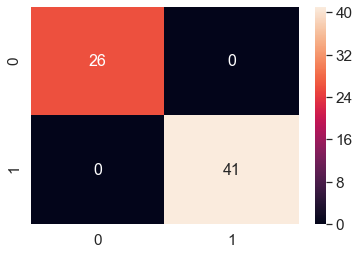

In [182]:


#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_xgb=confusion_matrix(y_test, y_pred_xgb_new)

df_cm_xgb = pd.DataFrame(cm_xgb, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_xgb, annot=True, annot_kws={"size": 16}) #font size


plt.show()

# LightGBM

In [183]:
#lgb
from lightgbm import LGBMClassifier
import time 
start_time = time.time()
classifier_lgb =LGBMClassifier()
classifier_lgb.fit(X_train, y_train)
y_pred_lgb=classifier_lgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lgb)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.19985175132751465 seconds ---


In [184]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_lgb = f1_score(y_test, y_pred_lgb)
prec_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
print(f1_lgb)
print(prec_lgb)
print(recall_lgb)
#f1_score=0.9859, precision= 0.9722 ,recall=1.0
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#f1_score=0.9841, precision= 0.9687 ,recall=1.0
#f1_score=0.9841, precision= 1.0 ,recall=0.96875



#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_lgb=confusion_matrix(y_test, y_pred_lgb)
cm_lgb


1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [185]:
TP_lgb = cm_lgb[0][0]
FP_lgb = cm_lgb[0][1]
FN_lgb = cm_lgb[1][0]
TN_lgb = cm_lgb[1][1]

# calculate accuracy
lgb_accuracy = (float (TP_lgb+TN_lgb) / float(TP_lgb + TN_lgb + FP_lgb + FN_lgb))
    
# calculate mis-classification
lgb_misclassification = 1- lgb_accuracy
    
# calculate the sensitivity
lgb_sensitivity = (TP_lgb / float(TP_lgb + FN_lgb))    # calculate the specificity
lgb_specificity = (TN_lgb / float(TN_lgb + FP_lgb))
# calculate precision
lgb_precision = (TN_lgb / float(TN_lgb + FP_lgb))    # calculate f_1 score
lgb_f1 = 2 * ((lgb_precision * lgb_sensitivity) / (lgb_precision + lgb_sensitivity))

# calculate MCC
import math
lgb_x= (TP_lgb +FP_lgb) * (TP_lgb + FN_lgb) * (TN_lgb + FP_lgb) * (TN_lgb + FN_lgb)
lgb_mcc = (TP_lgb * TN_lgb - FP_lgb * FN_lgb) / float(math.sqrt(lgb_x))

print("Accuracy ---> {0}".format(lgb_accuracy))
print("Missclassification ---> {0}".format(lgb_misclassification))
print("Sensitivity ---> {0}".format(lgb_sensitivity))
print("Sensitivity ---> {0}".format(lgb_specificity))
print("Precision ---> {0}".format(lgb_precision))
print("F1_Score ---> {0}".format(lgb_f1))
print("MCC ---> {0}".format(lgb_mcc))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Sensitivity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


In [186]:
#Applying PCA to lgb
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
classifier_lgb.fit(X_train_new, y_train)
y_pred_lgb_new=classifier_lgb.predict(X_test_new)
accuracy_score(y_test, y_pred_lgb_new)
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.15488886833190918 seconds ---


In [187]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_lgb_new = f1_score(y_test, y_pred_lgb_new)
prec_lgb_new = precision_score(y_test, y_pred_lgb_new)
recall_lgb_new = recall_score(y_test, y_pred_lgb_new)
print(f1_lgb_new)
print(prec_lgb_new)
print(recall_lgb_new)
#f1_score=0.9859, precision= 0.9722 ,recall=1.0
#f1_score=0.9850, precision= 1.0 ,recall=0.9705
#1,1,1



#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_lgb_new=confusion_matrix(y_test, y_pred_lgb_new)
cm_lgb_new


1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [188]:
TP_lgb_new = cm_lgb_new[0][0]
FP_lgb_new = cm_lgb_new[0][1]
FN_lgb_new = cm_lgb_new[1][0]
TN_lgb_new = cm_lgb_new[1][1]

# calculate accuracy
lgb_accuracy_new = (float (TP_lgb_new+TN_lgb_new) / float(TP_lgb_new + TN_lgb_new + FP_lgb_new + FN_lgb_new))
    
# calculate mis-classification
lgb_misclassification_new = 1- lgb_accuracy_new
    
# calculate the sensitivity
lgb_sensitivity_new = (TP_lgb_new / float(TP_lgb_new + FN_lgb_new))    # calculate the specificity
lgb_specificity_new = (TN_lgb_new / float(TN_lgb_new + FP_lgb_new))
# calculate precision
lgb_precision_new = (TN_lgb_new / float(TN_lgb_new + FP_lgb_new))    # calculate f_1 score
lgb_f1_new = 2 * ((lgb_precision_new * lgb_sensitivity_new) / (lgb_precision_new + lgb_sensitivity_new))

# calculate MCC
import math
lgb_x_new= (TP_lgb_new +FP_lgb_new) * (TP_lgb_new + FN_lgb_new) * (TN_lgb_new + FP_lgb_new) * (TN_lgb_new + FN_lgb_new)
lgb_mcc_new = (TP_lgb_new * TN_lgb_new - FP_lgb_new * FN_lgb_new) / float(math.sqrt(lgb_x_new))

print("Accuracy ---> {0}".format(lgb_accuracy_new))
print("Missclassification ---> {0}".format(lgb_misclassification_new))
print("Sensitivity ---> {0}".format(lgb_sensitivity_new))
print("Specificity ---> {0}".format(lgb_specificity_new))
print("Precision ---> {0}".format(lgb_precision_new))
print("F1_Score ---> {0}".format(lgb_f1_new))
print("MCC ---> {0}".format(lgb_mcc_new))




Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


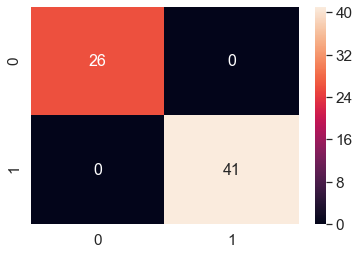

In [189]:

#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_lgb=confusion_matrix(y_test, y_pred_lgb_new)

df_cm_lgb = pd.DataFrame(cm_lgb, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_lgb, annot=True, annot_kws={"size": 16}) #font size


plt.show()

# CATBoost

In [190]:
#cgb
from catboost import CatBoostClassifier
import time 
start_time = time.time()
classifier_cgb =CatBoostClassifier(verbose=0, n_estimators=100)
classifier_cgb.fit(X_train, y_train)
y_pred_cgb=classifier_cgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_cgb)
print(accuracy_score)
print("--- %s seconds ---" % (time.time() - start_time))

<function accuracy_score at 0x00000247E6EF92F0>
--- 0.5247597694396973 seconds ---


In [191]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_cgb = f1_score(y_test, y_pred_cgb)
prec_cgb = precision_score(y_test, y_pred_cgb)
recall_cgb = recall_score(y_test, y_pred_cgb)
print(f1_cgb)
print(prec_cgb)
print(recall_cgb)
#f1_score=0.9859, precision= 0.9722 ,recall=1.0
#f1_score=0.9846, precision= 1.0 ,recall=0.9696
#f1_score=0.9841, precision= 0.9687 ,recall=1.0
#f1_score=0.9841, precision= 1.0 ,recall=0.96875



#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_cgb=confusion_matrix(y_test, y_pred_cgb)
cm_cgb


0.9876543209876543
1.0
0.975609756097561


array([[26,  0],
       [ 1, 40]], dtype=int64)

In [192]:

TP_cgb = cm_cgb[0][0]
FP_cgb = cm_cgb[0][1]
FN_cgb = cm_cgb[1][0]
TN_cgb = cm_cgb[1][1]

# calculate accuracy
cgb_accuracy = (float (TP_cgb+TN_cgb) / float(TP_cgb + TN_cgb + FP_cgb + FN_cgb))
    
# calculate mis-classification
cgb_misclassification = 1- cgb_accuracy
    
# calculate the sensitivity
cgb_sensitivity = (TP_cgb / float(TP_cgb + FN_cgb))    # calculate the specificity
cgb_specificity = (TN_cgb / float(TN_cgb + FP_cgb))
# calculate precision
cgb_precision = (TN_cgb / float(TN_cgb + FP_cgb))    # calculate f_1 score
cgb_f1 = 2 * ((cgb_precision * cgb_sensitivity) / (cgb_precision + cgb_sensitivity))

# calculate MCC
import math
cgb_x= (TP_cgb +FP_cgb) * (TP_cgb + FN_cgb) * (TN_cgb + FP_cgb) * (TN_cgb + FN_cgb)
cgb_mcc = (TP_cgb * TN_cgb - FP_cgb * FN_cgb) / float(math.sqrt(cgb_x))

print("Accuracy ---> {0}".format(cgb_accuracy))
print("Missclassification ---> {0}".format(cgb_misclassification))
print("Sensitivity ---> {0}".format(cgb_sensitivity))
print("Sensitivity ---> {0}".format(cgb_specificity))
print("Precision ---> {0}".format(cgb_precision))
print("F1_Score ---> {0}".format(cgb_f1))
print("MCC ---> {0}".format(cgb_mcc))

Accuracy ---> 0.9850746268656716
Missclassification ---> 0.014925373134328401
Sensitivity ---> 0.9629629629629629
Sensitivity ---> 1.0
Precision ---> 1.0
F1_Score ---> 0.9811320754716981
MCC ---> 0.9692657331337372


In [193]:
#Applying PCA to cgb
from sklearn.decomposition import PCA
import time 
start_time = time.time()
pca= PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
classifier_cgb.fit(X_train_new, y_train)
y_pred_cgb_new=classifier_cgb.predict(X_test_new)
accuracy_score(y_test, y_pred_cgb_new)
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.35984206199645996 seconds ---


In [194]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_cgb_new = f1_score(y_test, y_pred_cgb_new)
prec_cgb_new = precision_score(y_test, y_pred_cgb_new)
recall_cgb_new = recall_score(y_test, y_pred_cgb_new)
print(f1_cgb_new)
print(prec_cgb_new)
print(recall_cgb_new)
#f1_score=0.9859, precision= 0.9722 ,recall=1.0
#f1_score=0.9850, precision= 1.0 ,recall=0.9705
#1,1,1



#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_cgb_new=confusion_matrix(y_test, y_pred_cgb_new)
cm_cgb_new

1.0
1.0
1.0


array([[26,  0],
       [ 0, 41]], dtype=int64)

In [195]:
TP_cgb_new = cm_cgb_new[0][0]
FP_cgb_new = cm_cgb_new[0][1]
FN_cgb_new = cm_cgb_new[1][0]
TN_cgb_new = cm_cgb_new[1][1]

# calculate accuracy
cgb_accuracy_new = (float (TP_cgb_new+TN_cgb_new) / float(TP_cgb_new + TN_cgb_new + FP_cgb_new + FN_cgb_new))
    
# calculate mis-classification
cgb_misclassification_new = 1- cgb_accuracy_new
    
# calculate the sensitivity
cgb_sensitivity_new = (TP_cgb_new / float(TP_cgb_new + FN_cgb_new))    # calculate the specificity
cgb_specificity_new = (TN_cgb_new / float(TN_cgb_new + FP_cgb_new))
# calculate precision
cgb_precision_new = (TN_cgb_new / float(TN_cgb_new + FP_cgb_new))    # calculate f_1 score
cgb_f1_new = 2 * ((cgb_precision_new * cgb_sensitivity_new) / (cgb_precision_new + cgb_sensitivity_new))

# calculate MCC
import math
cgb_x_new= (TP_cgb_new +FP_cgb_new) * (TP_cgb_new + FN_cgb_new) * (TN_cgb_new + FP_cgb_new) * (TN_cgb_new + FN_cgb_new)
cgb_mcc_new = (TP_cgb_new * TN_cgb_new - FP_cgb_new * FN_cgb_new) / float(math.sqrt(cgb_x_new))

print("Accuracy ---> {0}".format(cgb_accuracy_new))
print("Missclassification ---> {0}".format(cgb_misclassification_new))
print("Sensitivity ---> {0}".format(cgb_sensitivity_new))
print("Specificity ---> {0}".format(cgb_specificity_new))
print("Precision ---> {0}".format(cgb_precision_new))
print("F1_Score ---> {0}".format(cgb_f1_new))
print("MCC ---> {0}".format(cgb_mcc_new))

Accuracy ---> 1.0
Missclassification ---> 0.0
Sensitivity ---> 1.0
Specificity ---> 1.0
Precision ---> 1.0
F1_Score ---> 1.0
MCC ---> 1.0


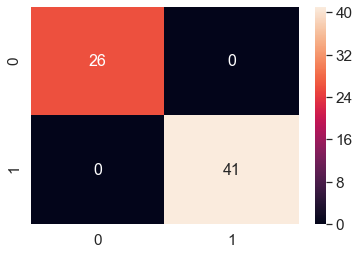

In [196]:

#Making confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_cgb=confusion_matrix(y_test, y_pred_cgb_new)

df_cm_cgb = pd.DataFrame(cm_cgb, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_cgb, annot=True, annot_kws={"size": 16}) #font size


plt.show()